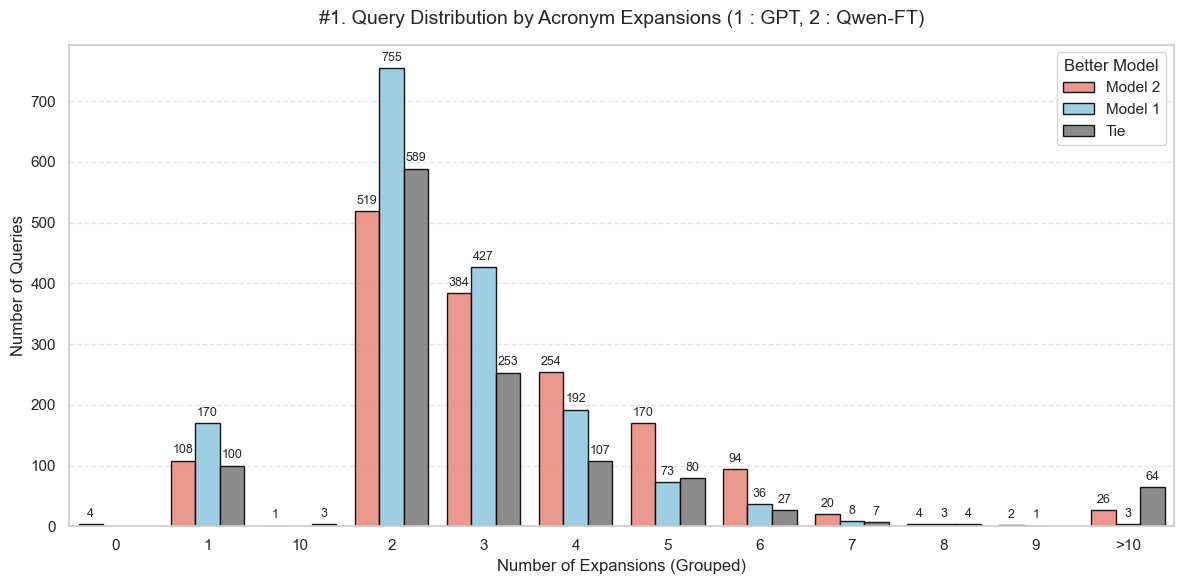

In [30]:
import json

with open("/Users/rishabh.singh/Desktop/ai-search-retrieval-pipeline-poc-2/app/evaluation_v1/results/mismatched_evaluation_results_gpt1.json", 'r') as f :
    data = json.load(f)

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
records = []
for item in data:
    better_model = item.get("better_model", "Tie").strip()
    model_1 = item.get("model_1_gpt", {})
    model_2 = item.get("model_2_qwen_ft", {})

    expansions_model_1 = sum(len(v) for v in model_1.values())
    expansions_model_2 = sum(len(v) for v in model_2.values())

    if better_model.lower() == "model 1":
        winner = "Model 1"
        expansions = expansions_model_1
    elif better_model.lower() == "model 2":
        winner = "Model 2"
        expansions = expansions_model_2
    else:
        winner = "Tie"
        expansions = max(expansions_model_1, expansions_model_2)

    records.append({
        "Better Model": winner,
        "Expansions": expansions
    })

df = pd.DataFrame(records)

# === Threshold grouping ===
threshold = 10  # Customize your threshold here
df["Expansion Group"] = df["Expansions"].apply(
    lambda x: f">{threshold}" if x > threshold else str(x)
)

# === Grouped count for plot ===
grouped_df = df.groupby(["Expansion Group", "Better Model"]).size().reset_index(name="Query Count")

# Sort X-axis so that numeric groups are in order before ">threshold"
grouped_df["Expansion Group"] = pd.Categorical(
    grouped_df["Expansion Group"],
    categories=sorted([str(i) for i in range(0, threshold + 1)] + [f">{threshold}"]),
    ordered=True
)

# === Plot ===
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=grouped_df,
    x="Expansion Group",
    y="Query Count",
    hue="Better Model",
    palette={"Model 1": "skyblue", "Model 2": "salmon", "Tie": "gray"},
    edgecolor="black",
    alpha=0.9
)

# === Add value labels on bars ===
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# === Styling ===
plt.title(f"#1. Query Distribution by Acronym Expansions (1 : GPT, 2 : Qwen-FT)", fontsize=14, pad=15)
plt.xlabel("Number of Expansions (Grouped)", fontsize=12)
plt.ylabel("Number of Queries", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Better Model")
plt.tight_layout()

# === Show ===
plt.show()

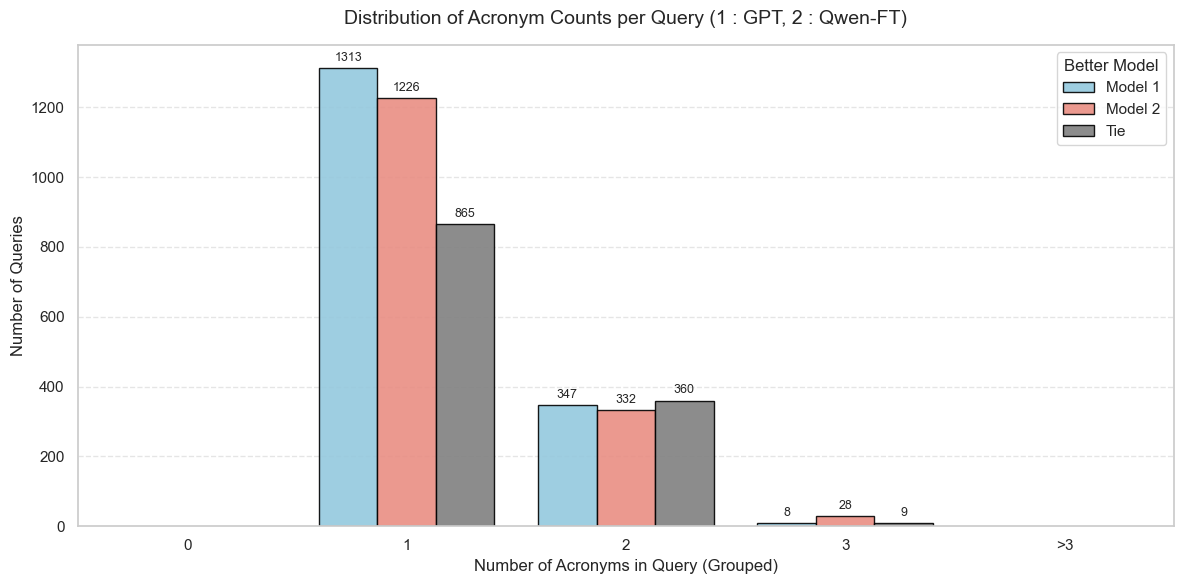

In [15]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Load data ===
with open("/Users/rishabh.singh/Desktop/ai-search-retrieval-pipeline-poc-2/app/evaluation_v1/results/mismatched_evaluation_results_gpt1.json", 'r') as f:
    data = json.load(f)

# === Prepare acronym count data ===
records = []
for item in data:
    better_model = item.get("better_model", "Tie").strip()
    acronyms = item.get("candidate_acronyms", [])
    acronym_count = len(acronyms)

    records.append({
        "Better Model": better_model,
        "Acronym Count": acronym_count
    })

df = pd.DataFrame(records)

# === Threshold grouping ===
threshold = 3
df["Acronym Count Group"] = df["Acronym Count"].apply(
    lambda x: f">{threshold}" if x > threshold else str(x)
)

# === Group and count ===
grouped_df = df.groupby(["Acronym Count Group", "Better Model"]).size().reset_index(name="Query Count")

# === Sort x-axis categories ===
grouped_df["Acronym Count Group"] = pd.Categorical(
    grouped_df["Acronym Count Group"],
    categories=sorted([str(i) for i in range(0, threshold + 1)] + [f">{threshold}"]),
    ordered=True
)

# === Plotting ===
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=grouped_df,
    x="Acronym Count Group",
    y="Query Count",
    hue="Better Model",
    palette={"Model 1": "skyblue", "Model 2": "salmon", "Tie": "gray"},
    edgecolor="black",
    alpha=0.9
)

# === Label each bar with count ===
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# === Styling ===
plt.title(f"Distribution of Acronym Counts per Query (1 : GPT, 2 : Qwen-FT)", fontsize=14, pad=15)
plt.xlabel("Number of Acronyms in Query (Grouped)", fontsize=12)
plt.ylabel("Number of Queries", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Better Model")
plt.tight_layout()

# === Show plot ===
plt.show()


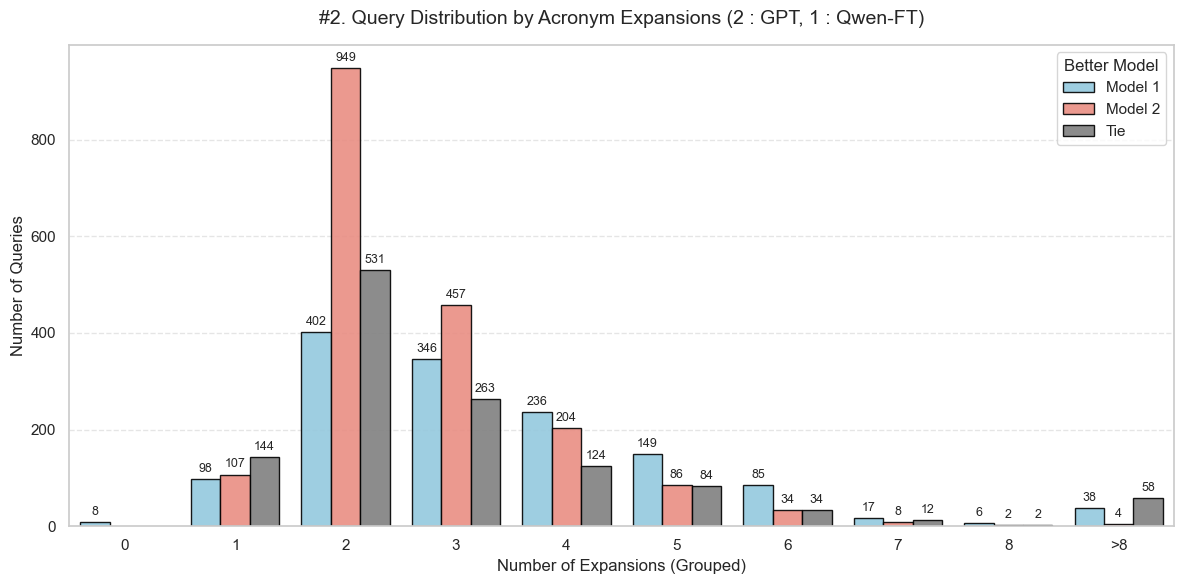

In [31]:
import json

with open("/Users/rishabh.singh/Desktop/ai-search-retrieval-pipeline-poc-2/app/evaluation_v1/results/mismatched_evaluation_results_gpt2.json", 'r') as f :
    data = json.load(f)

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
records = []
for item in data:
    better_model = item.get("better_model", "Tie").strip()
    model_1 = item.get("model_1_qwen_ft", {})
    model_2 = item.get("model_2_gpt", {})

    expansions_model_1 = sum(len(v) for v in model_1.values())
    expansions_model_2 = sum(len(v) for v in model_2.values())

    if better_model.lower() == "model 1":
        winner = "Model 1"
        expansions = expansions_model_1
    elif better_model.lower() == "model 2":
        winner = "Model 2"
        expansions = expansions_model_2
    else:
        winner = "Tie"
        expansions = max(expansions_model_1, expansions_model_2)

    records.append({
        "Better Model": winner,
        "Expansions": expansions
    })

df = pd.DataFrame(records)

# === Threshold grouping ===
threshold = 8  # Customize your threshold here
df["Expansion Group"] = df["Expansions"].apply(
    lambda x: f">{threshold}" if x > threshold else str(x)
)

# === Grouped count for plot ===
grouped_df = df.groupby(["Expansion Group", "Better Model"]).size().reset_index(name="Query Count")

# Sort X-axis so that numeric groups are in order before ">threshold"
grouped_df["Expansion Group"] = pd.Categorical(
    grouped_df["Expansion Group"],
    categories=sorted([str(i) for i in range(0, threshold + 1)] + [f">{threshold}"]),
    ordered=True
)

# === Plot ===
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=grouped_df,
    x="Expansion Group",
    y="Query Count",
    hue="Better Model",
    palette={"Model 1": "skyblue", "Model 2": "salmon", "Tie": "gray"},
    edgecolor="black",
    alpha=0.9
)

# === Add value labels on bars ===
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# === Styling ===
plt.title(f"#2. Query Distribution by Acronym Expansions (2 : GPT, 1 : Qwen-FT)", fontsize=14, pad=15)
plt.xlabel("Number of Expansions (Grouped)", fontsize=12)
plt.ylabel("Number of Queries", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Better Model")
plt.tight_layout()

# === Show ===
plt.show()

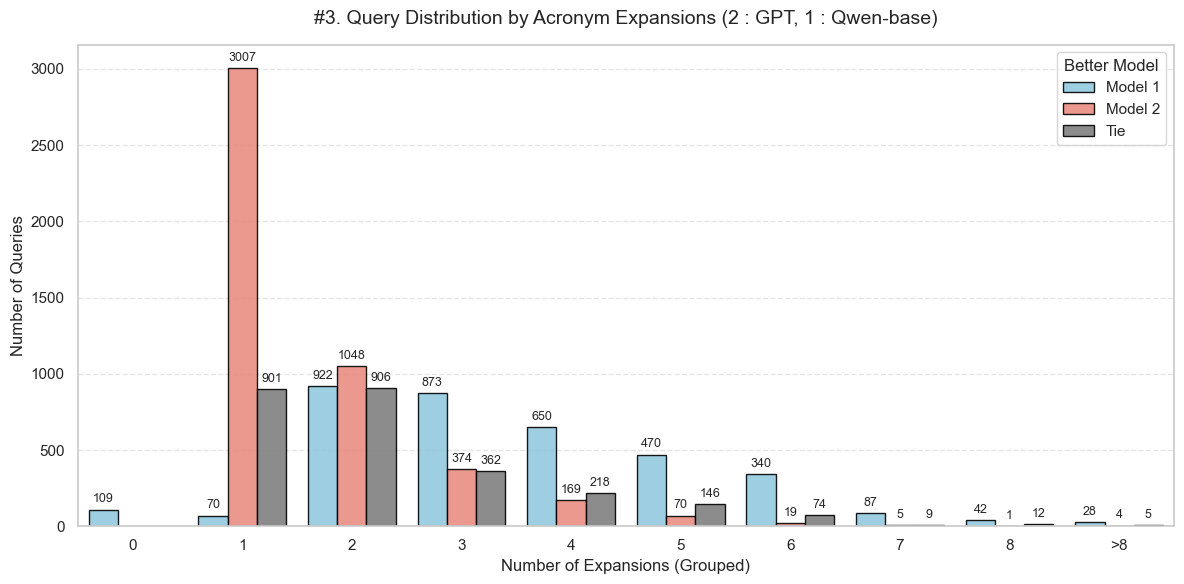

In [33]:
import json

with open("/Users/rishabh.singh/Desktop/ai-search-retrieval-pipeline-poc-2/app/evaluation_v1/results/mismatched_evaluation_results_gpt_base.json", 'r') as f :
    data = json.load(f)

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
records = []
for item in data:
    better_model = item.get("better_model", "Tie").strip()
    model_1 = item.get("model_1_qwen_ft", {})
    model_2 = item.get("model_2_gpt", {})

    expansions_model_1 = sum(len(v) for v in model_1.values())
    expansions_model_2 = sum(len(v) for v in model_2.values())

    if better_model.lower() == "model 1":
        winner = "Model 1"
        expansions = expansions_model_1
    elif better_model.lower() == "model 2":
        winner = "Model 2"
        expansions = expansions_model_2
    else:
        winner = "Tie"
        expansions = max(expansions_model_1, expansions_model_2)

    records.append({
        "Better Model": winner,
        "Expansions": expansions
    })

df = pd.DataFrame(records)

# === Threshold grouping ===
threshold = 8  # Customize your threshold here
df["Expansion Group"] = df["Expansions"].apply(
    lambda x: f">{threshold}" if x > threshold else str(x)
)

# === Grouped count for plot ===
grouped_df = df.groupby(["Expansion Group", "Better Model"]).size().reset_index(name="Query Count")

# Sort X-axis so that numeric groups are in order before ">threshold"
grouped_df["Expansion Group"] = pd.Categorical(
    grouped_df["Expansion Group"],
    categories=sorted([str(i) for i in range(0, threshold + 1)] + [f">{threshold}"]),
    ordered=True
)

# === Plot ===
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=grouped_df,
    x="Expansion Group",
    y="Query Count",
    hue="Better Model",
    palette={"Model 1": "skyblue", "Model 2": "salmon", "Tie": "gray"},
    edgecolor="black",
    alpha=0.9
)

# === Add value labels on bars ===
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# === Styling ===
plt.title(f"#3. Query Distribution by Acronym Expansions (2 : GPT, 1 : Qwen-base)", fontsize=14, pad=15)
plt.xlabel("Number of Expansions (Grouped)", fontsize=12)
plt.ylabel("Number of Queries", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Better Model")
plt.tight_layout()

# === Show ===
plt.show()

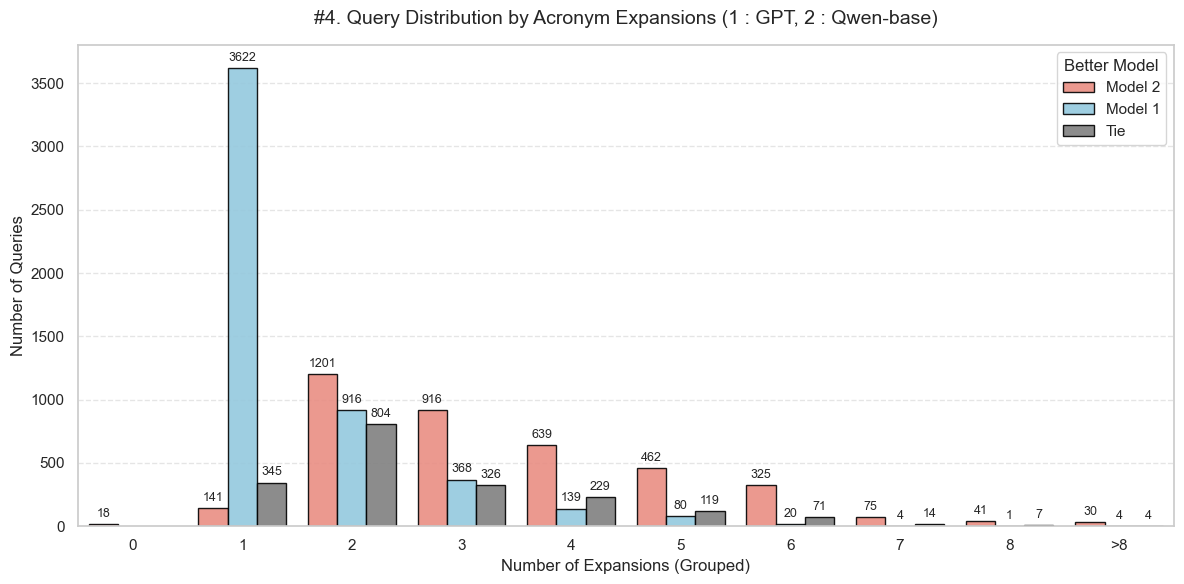

In [34]:
import json

with open("/Users/rishabh.singh/Desktop/ai-search-retrieval-pipeline-poc-2/app/evaluation_v1/results/mismatched_evaluation_results_gpt_base_2.json", 'r') as f :
    data = json.load(f)

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
records = []
for item in data:
    better_model = item.get("better_model", "Tie").strip()
    model_1 = item.get("model_1_gpt", {})
    model_2 = item.get("model_2_qwen_base", {})

    expansions_model_1 = sum(len(v) for v in model_1.values())
    expansions_model_2 = sum(len(v) for v in model_2.values())

    if better_model.lower() == "model 1":
        winner = "Model 1"
        expansions = expansions_model_1
    elif better_model.lower() == "model 2":
        winner = "Model 2"
        expansions = expansions_model_2
    else:
        winner = "Tie"
        expansions = max(expansions_model_1, expansions_model_2)

    records.append({
        "Better Model": winner,
        "Expansions": expansions
    })

df = pd.DataFrame(records)

# === Threshold grouping ===
threshold = 8  # Customize your threshold here
df["Expansion Group"] = df["Expansions"].apply(
    lambda x: f">{threshold}" if x > threshold else str(x)
)

# === Grouped count for plot ===
grouped_df = df.groupby(["Expansion Group", "Better Model"]).size().reset_index(name="Query Count")

# Sort X-axis so that numeric groups are in order before ">threshold"
grouped_df["Expansion Group"] = pd.Categorical(
    grouped_df["Expansion Group"],
    categories=sorted([str(i) for i in range(0, threshold + 1)] + [f">{threshold}"]),
    ordered=True
)

# === Plot ===
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=grouped_df,
    x="Expansion Group",
    y="Query Count",
    hue="Better Model",
    palette={"Model 1": "skyblue", "Model 2": "salmon", "Tie": "gray"},
    edgecolor="black",
    alpha=0.9
)

# === Add value labels on bars ===
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# === Styling ===
plt.title(f"#4. Query Distribution by Acronym Expansions (1 : GPT, 2 : Qwen-base)", fontsize=14, pad=15)
plt.xlabel("Number of Expansions (Grouped)", fontsize=12)
plt.ylabel("Number of Queries", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Better Model")
plt.tight_layout()

# === Show ===
plt.show()